In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Files to load
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine into a single dataset
merged = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

In [2]:
merged.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [3]:
# Total number of schools
total_schools = merged["School ID"].nunique()
total_schools

15

In [4]:
# Total number of students
total_students = merged["Student ID"].count()
total_students

39170

In [5]:
# Total budget
total_budget = school_data["budget"].sum()
total_budget

24649428

In [6]:
# verage math score
average_math = merged['math_score'].mean()
average_math

78.98537145774827

In [7]:
# Calculate the average reading score
average_reading = merged['reading_score'].mean()
average_reading

81.87784018381414

In [8]:
# Calculate the percentage of students with a passing math score (70 or greater)
pass_math = (merged['math_score']>=70).sum()/total_students
pass_math*100

74.9808526933878

In [9]:
# Calculate the percentage of students with a passing reading score (70 or greater) 
pass_reading = (merged['reading_score']>=70).sum()/total_students
pass_reading*100

85.80546336482001

In [10]:
# Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2
pass_overall = (pass_math+pass_reading)/2
pass_overall*100

80.3931580291039

In [11]:
district_summary = pd.DataFrame({"Total Schools":[total_schools],
                                 "Total Budget":[total_budget],
                                 "Total Students":[total_students],
                                 "Avg Math Score":[average_math],
                                 "Avg Reading Score":[average_reading],
                                 "% Passing Math":[pass_math*100],
                                 "% Passing Reading":[pass_reading*100],
                                 "% Overall Passing Rate":[pass_overall*100]
})
district_summary

,Total Schools,Total Budget,Total Students,Avg Math Score,Avg Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,24649428,39170,78.985371,81.87784,74.980853,85.805463,80.393158


In [12]:
#store as different df to change order
dist_sum = district_summary[["Total Schools", 
                             "Total Students", 
                             "Total Budget", 
                             "Avg Math Score", 
                             "Avg Reading Score",
                             '% Passing Math',
                             '% Passing Reading', 
                             '% Overall Passing Rate']]

In [13]:
dist_sum.style.format({
    "Total Budget": "${:,.2f}"})

,Total Schools,Total Students,Total Budget,Avg Math Score,Avg Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,39170,"$24,649,428.00",78.985371,81.877840,74.980853,85.805463,80.393158


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

In [14]:
school = school_data["school_name"]
school_type = school_data["type"]
students = school_data["size"]
budget = school_data["budget"]
math_average = merged.groupby(["school_name"])["math_score"].mean()
reading_average = merged.groupby(["school_name"])["reading_score"].mean()
math_passing = merged[student_data.math_score>=70].groupby('school_name')['math_score'].count()/merged.groupby(["school_name"])["Student ID"].count()
math_passing = math_passing*100
reading_passing = merged[student_data.reading_score>=70].groupby('school_name')['reading_score'].count()/merged.groupby(["school_name"])["Student ID"].count()
reading_passing = reading_passing*100
overall_passing = (math_passing + reading_passing)/2

school_summary1_df = pd.DataFrame({
    "School":school,
    "School Type":school_type,
    "Total Students":students,
    "Total Budget":total_budget,
    "Budget Per School":budget
})

school_summary2_df = pd.DataFrame({
    "Avg Math Score":math_average,
    "Avg Reading Score":reading_average,
    "% Passing Math":math_passing,
    "% Passing Reading":reading_passing,
    "% Overall Passing Rate":overall_passing
})

school_summary = school_summary1_df.join(school_summary2_df,on='School',how='inner')
school_summary

,School,School Type,Total Students,Total Budget,Budget Per School,Avg Math Score,Avg Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,Huang High School,District,2917,24649428,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
1,Figueroa High School,District,2949,24649428,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
2,Shelton High School,Charter,1761,24649428,1056600,83.359455,83.725724,93.867121,95.854628,94.860875
3,Hernandez High School,District,4635,24649428,3022020,77.289752,80.934412,66.752967,80.862999,73.807983
4,Griffin High School,Charter,1468,24649428,917500,83.351499,83.816757,93.392371,97.138965,95.265668
5,Wilson High School,Charter,2283,24649428,1319574,83.274201,83.989488,93.867718,96.539641,95.203679
6,Cabrera High School,Charter,1858,24649428,1081356,83.061895,83.975780,94.133477,97.039828,95.586652
7,Bailey High School,District,4976,24649428,3124928,77.048432,81.033963,66.680064,81.933280,74.306672
8,Holden High School,Charter,427,24649428,248087,83.803279,83.814988,92.505855,96.252927,94.379391
9,Pena High School,Charter,962,24649428,585858,83.839917,84.044699,94.594595,95.945946,95.270270


In [15]:
school_sum = school_summary[["School", 
                             "School Type", 
                             "Total Students", 
                             "Total Budget", 
                             "Budget Per School",
                             '% Passing Math',
                             'Avg Math Score',
                             'Avg Reading Score',
                             '% Passing Reading', 
                             '% Overall Passing Rate']]

In [16]:
school_sum.style.format({
    "Total Budget": "${:,.2f}",
    "Budget Per School": "${:,.2f}"})

,School,School Type,Total Students,Total Budget,Budget Per School,% Passing Math,Avg Math Score,Avg Reading Score,% Passing Reading,% Overall Passing Rate
0,Huang High School,District,2917,"$24,649,428.00","$1,910,635.00",65.683922,76.629414,81.182722,81.316421,73.500171
1,Figueroa High School,District,2949,"$24,649,428.00","$1,884,411.00",65.988471,76.711767,81.158020,80.739234,73.363852
2,Shelton High School,Charter,1761,"$24,649,428.00","$1,056,600.00",93.867121,83.359455,83.725724,95.854628,94.860875
3,Hernandez High School,District,4635,"$24,649,428.00","$3,022,020.00",66.752967,77.289752,80.934412,80.862999,73.807983
4,Griffin High School,Charter,1468,"$24,649,428.00","$917,500.00",93.392371,83.351499,83.816757,97.138965,95.265668
5,Wilson High School,Charter,2283,"$24,649,428.00","$1,319,574.00",93.867718,83.274201,83.989488,96.539641,95.203679
6,Cabrera High School,Charter,1858,"$24,649,428.00","$1,081,356.00",94.133477,83.061895,83.975780,97.039828,95.586652
7,Bailey High School,District,4976,"$24,649,428.00","$3,124,928.00",66.680064,77.048432,81.033963,81.933280,74.306672
8,Holden High School,Charter,427,"$24,649,428.00","$248,087.00",92.505855,83.803279,83.814988,96.252927,94.379391
9,Pena High School,Charter,962,"$24,649,428.00","$585,858.00",94.594595,83.839917,84.044699,95.945946,95.270270


## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [17]:
top5_df = school_sum.sort_values("% Overall Passing Rate", ascending=False)

top5_df.head()

,School,School Type,Total Students,Total Budget,Budget Per School,% Passing Math,Avg Math Score,Avg Reading Score,% Passing Reading,% Overall Passing Rate
6,Cabrera High School,Charter,1858,24649428,1081356,94.133477,83.061895,83.975780,97.039828,95.586652
14,Thomas High School,Charter,1635,24649428,1043130,93.272171,83.418349,83.848930,97.308869,95.290520
9,Pena High School,Charter,962,24649428,585858,94.594595,83.839917,84.044699,95.945946,95.270270
4,Griffin High School,Charter,1468,24649428,917500,93.392371,83.351499,83.816757,97.138965,95.265668
5,Wilson High School,Charter,2283,24649428,1319574,93.867718,83.274201,83.989488,96.539641,95.203679


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [18]:
bottom5_df = school_summary.sort_values("% Overall Passing Rate", ascending=True)

bottom5_df.head()

,School,School Type,Total Students,Total Budget,Budget Per School,Avg Math Score,Avg Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
11,Rodriguez High School,District,3999,24649428,2547363,76.842711,80.744686,66.366592,80.220055,73.293323
1,Figueroa High School,District,2949,24649428,1884411,76.711767,81.158020,65.988471,80.739234,73.363852
0,Huang High School,District,2917,24649428,1910635,76.629414,81.182722,65.683922,81.316421,73.500171
12,Johnson High School,District,4761,24649428,3094650,77.072464,80.966394,66.057551,81.222432,73.639992
13,Ford High School,District,2739,24649428,1763916,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [19]:
ninth = merged[(merged["grade"] == "9th")]
tenth = merged[(merged["grade"] == "10th")]
eleventh = merged[(merged["grade"] == "11th")]
twelfth = merged[(merged["grade"] == "12th")]

ninthscore = ninth.groupby("school_name")["math_score"].mean()
tenthscore = tenth.groupby("school_name")["math_score"].mean()
eleventhscore = eleventh.groupby("school_name")["math_score"].mean()
twelfthscore = twelfth.groupby("school_name")["math_score"].mean()

mathscores=pd.DataFrame({
    "9th":ninthscore,
    "10th":tenthscore,
    "11th":eleventhscore,
    "12th":twelfthscore
})
mathscores

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [20]:
ninereading = ninth.groupby("school_name")["reading_score"].mean()
tenreading = tenth.groupby("school_name")["reading_score"].mean()
elevenreading = eleventh.groupby("school_name")["reading_score"].mean()
twelvereading = twelfth.groupby("school_name")["reading_score"].mean()

readingscores=pd.DataFrame({
    "9th":ninereading,
    "10th":tenreading,
    "11th":elevenreading,
    "12th":twelvereading
})
readingscores

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [21]:
budget_per_student = budget/students
bins = [0,585,615,645,675]
labels = ["<585","585-615","615-645","645-675"]
school_summary["Spending Ranges"] = pd.cut(budget_per_student,bins,labels=labels)

spendingmath = school_summary.groupby("Spending Ranges").mean()["Avg Math Score"]
spendingreading = school_summary.groupby("Spending Ranges").mean()["Avg Reading Score"]
spendingmathpass = school_summary.groupby("Spending Ranges").mean()["% Passing Math"]
spendingreadpass = school_summary.groupby("Spending Ranges").mean()["% Passing Reading"]
spendingoverallpass = (spendingmathpass+spendingreadpass)/2

spending_summary = pd.DataFrame({
    "Average Math Score":spendingmath,
    "Average Reading Score":spendingreading,
    "% Passing Math":spendingmathpass,
    "% Passing Reading":spendingreadpass,
    "% Passing Overall": spendingoverallpass
})
spending_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Passing Overall
Spending Ranges,,,,,
<585,83.455399,83.933814,93.460096,96.610877,95.035486
585-615,83.599686,83.885211,94.230858,95.900287,95.065572
615-645,79.079225,81.891436,75.668212,86.106569,80.887391
645-675,76.997210,81.027843,66.164813,81.133951,73.649382


## Scores by School Size

* Perform the same operations as above, based on school size.

In [22]:
sizebins = [0,1000,2000,6000]
sizelabels = ["Small (<1000)","Medium (1000-2000)","Large (>2000)"]
school_summary["School Size"] = pd.cut(students,sizebins,labels=sizelabels)

sizemath = school_summary.groupby("School Size").mean()["Avg Math Score"]
sizeread = school_summary.groupby("School Size").mean()["Avg Reading Score"]
sizemathpass = school_summary.groupby("School Size").mean()["% Passing Math"]
sizereadpass = school_summary.groupby("School Size").mean()["% Passing Reading"]
sizeoverallpass = (sizemathpass+sizereadpass)/2

size_summary = pd.DataFrame({
    "Average Math Score":sizemath,
    "Average Reading Score":sizeread,
    "% Passing Math":sizemathpass,
    "% Passing Reading":sizereadpass,
    "% Passing Overall":sizeoverallpass
})
size_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Passing Overall
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (>2000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

* Perform the same operations as above, based on school type.

In [23]:
typemath = school_summary.groupby("School Type").mean()["Avg Math Score"]
typeread = school_summary.groupby("School Type").mean()["Avg Reading Score"]
typemathpass = school_summary.groupby("School Type").mean()["% Passing Math"]
typereadpass = school_summary.groupby("School Type").mean()["% Passing Reading"]
typeoverallpass = (typemathpass+typereadpass)/2

type_summary = pd.DataFrame({
    "Average Math Score":typemath,
    "Average Reading Score":typeread,
    "% Passing Math":typemathpass,
    "% Passing Reading":typereadpass,
    "% Passing Overall":typeoverallpass
})
type_summary

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Passing Overall
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757


In [24]:
# Plots

In [25]:
school_sum.head()

,School,School Type,Total Students,Total Budget,Budget Per School,% Passing Math,Avg Math Score,Avg Reading Score,% Passing Reading,% Overall Passing Rate
0,Huang High School,District,2917,24649428,1910635,65.683922,76.629414,81.182722,81.316421,73.500171
1,Figueroa High School,District,2949,24649428,1884411,65.988471,76.711767,81.158020,80.739234,73.363852
2,Shelton High School,Charter,1761,24649428,1056600,93.867121,83.359455,83.725724,95.854628,94.860875
3,Hernandez High School,District,4635,24649428,3022020,66.752967,77.289752,80.934412,80.862999,73.807983
4,Griffin High School,Charter,1468,24649428,917500,93.392371,83.351499,83.816757,97.138965,95.265668


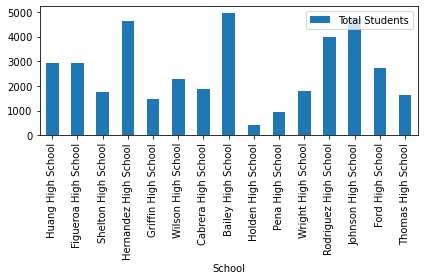

In [26]:
# Total Students per School
school_sum.plot(x ='School', y='Total Students', kind = 'bar')
plt.tight_layout()
plt.savefig('Plots/Total_Students.png')

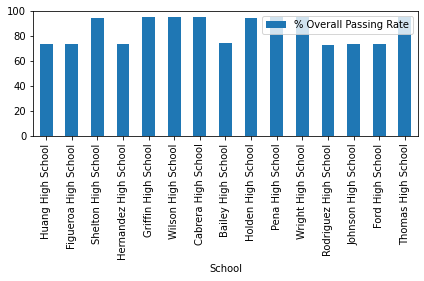

In [27]:
# Overall Passing Rate per School
school_sum.plot(x ='School', y='% Overall Passing Rate', kind = 'bar')
plt.tight_layout()
plt.savefig('Plots/Passing_Overall.png')

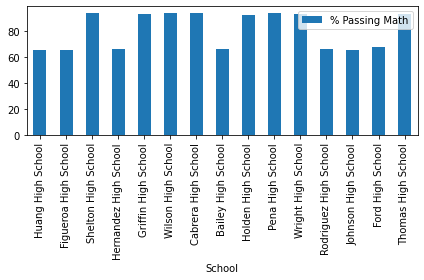

In [28]:
# Passing Math Rate per School
school_sum.plot(x ='School', y='% Passing Math', kind = 'bar')
plt.tight_layout()
plt.savefig('Plots/Passing_Math.png')

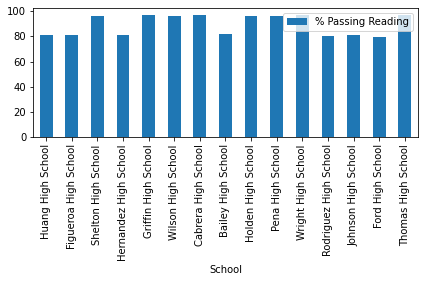

In [29]:
# Passing Reading Rate per School
school_sum.plot(x ='School', y='% Passing Reading', kind = 'bar')
plt.tight_layout()
plt.savefig('Plots/Passing_Reading.png')

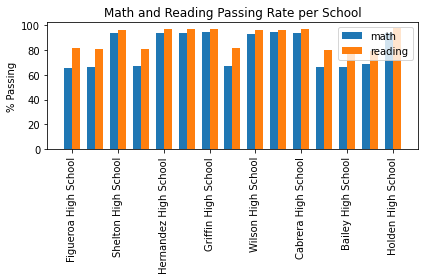

In [30]:
# Math and Reading Passing Rate per School
labels = school_sum['School']
math = school_sum['% Passing Math']
reading = school_sum['% Passing Reading']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, math, width, label='math')
rects2 = ax.bar(x + width/2, reading, width, label='reading')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Passing')
ax.set_title('Math and Reading Passing Rate per School')
ax.set_xticklabels(labels, rotation=90)
ax.legend()
plt.tight_layout()
plt.savefig('Plots/Passing_Math_Reading.png')
plt.show()

In [31]:
html = school_sum.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>School</th>
      <th>School Type</th>
      <th>Total Students</th>
      <th>Total Budget</th>
      <th>Budget Per School</th>
      <th>% Passing Math</th>
      <th>Avg Math Score</th>
      <th>Avg Reading Score</th>
      <th>% Passing Reading</th>
      <th>% Overall Passing Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Huang High School</td>
      <td>District</td>
      <td>2917</td>
      <td>24649428</td>
      <td>1910635</td>
      <td>65.683922</td>
      <td>76.629414</td>
      <td>81.182722</td>
      <td>81.316421</td>
      <td>73.500171</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Figueroa High School</td>
      <td>District</td>
      <td>2949</td>
      <td>24649428</td>
      <td>1884411</td>
      <td>65.988471</td>
      <td>76.711767</td>
      <td>81.158020</td>
      <td>80.739234</td>
      <td>73.363852</td>
   

In [33]:
html = top5_df.head().to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>School</th>
      <th>School Type</th>
      <th>Total Students</th>
      <th>Total Budget</th>
      <th>Budget Per School</th>
      <th>% Passing Math</th>
      <th>Avg Math Score</th>
      <th>Avg Reading Score</th>
      <th>% Passing Reading</th>
      <th>% Overall Passing Rate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td>Cabrera High School</td>
      <td>Charter</td>
      <td>1858</td>
      <td>24649428</td>
      <td>1081356</td>
      <td>94.133477</td>
      <td>83.061895</td>
      <td>83.975780</td>
      <td>97.039828</td>
      <td>95.586652</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Thomas High School</td>
      <td>Charter</td>
      <td>1635</td>
      <td>24649428</td>
      <td>1043130</td>
      <td>93.272171</td>
      <td>83.418349</td>
      <td>83.848930</td>
      <td>97.308869</td>
      <td>95.290520</td>
    